# ARIMA_RO

> *by Popescu Ionut-Alexandru*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


# Citirea si prelucrarea datelor

In [2]:
covid_df = pd.read_csv('F:\\Python\\COVID-19\\Covid-19-Romania\\Datasets\\JH_Data\\train.csv')
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
display(covid_df.dtypes)
covid_df.head(15)

Id                         int64
Province_State            object
Country_Region            object
Date              datetime64[ns]
ConfirmedCases           float64
Fatalities               float64
dtype: object

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
5,6,NaN,Afghanistan,2020-01-27,0.0,0.0
6,7,NaN,Afghanistan,2020-01-28,0.0,0.0
7,8,NaN,Afghanistan,2020-01-29,0.0,0.0
8,9,NaN,Afghanistan,2020-01-30,0.0,0.0
9,10,NaN,Afghanistan,2020-01-31,0.0,0.0


In [3]:
MINIMUM_CASES = 0
MINUM_DEATHS = 0

final_df = pd.DataFrame(columns=['Country','Date','ConfirmedCases','Fatalities'])
for country in covid_df['Country_Region'].unique():
    
    dummy_country = covid_df.loc[covid_df['Country_Region']==country]
    
    if not pd.isnull(dummy_country['Province_State'].values[0]):
        for state in dummy_country['Province_State'].unique():
            try:
                numar_cazuri = dummy_country.loc[dummy_country['Province_State']==state,'ConfirmedCases'].values[-1]
                numar_decese = dummy_country.loc[dummy_country['Province_State']==state,'Fatalities'].values[-1]
                if numar_cazuri > MINIMUM_CASES and numar_decese > MINUM_DEATHS:
                    dummy_state = dummy_country.loc[dummy_country['Province_State']==state]

                    name = f'{country} - {state}'
                    new_column = [name]*len(dummy_state)
                    dummy_state['Country'] = new_column
                    final_df = final_df.append(dummy_state[['Country','Date','ConfirmedCases','Fatalities']])
            except:
                pass
    else:
        numar_cazuri = dummy_country['ConfirmedCases'].values[-1]
        numar_decese = dummy_country['Fatalities'].values[-1]
        if numar_cazuri > MINIMUM_CASES and numar_decese > MINUM_DEATHS:
            dummy_country = dummy_country.rename(columns={'Country_Region':'Country'})
            final_df = final_df.append(dummy_country[['Country','Date','ConfirmedCases','Fatalities']])

In [4]:
display(final_df.dtypes)
final_df.head(15)

Country                   object
Date              datetime64[ns]
ConfirmedCases           float64
Fatalities               float64
dtype: object

,Country,Date,ConfirmedCases,Fatalities
0,Afghanistan,2020-01-22,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0
5,Afghanistan,2020-01-27,0.0,0.0
6,Afghanistan,2020-01-28,0.0,0.0
7,Afghanistan,2020-01-29,0.0,0.0
8,Afghanistan,2020-01-30,0.0,0.0
9,Afghanistan,2020-01-31,0.0,0.0


In [5]:
def make_timeserie_ndarray(df,ts):
    result = np.zeros((len(df['Country'].unique()),77,1))
    for i,country in enumerate(df['Country'].unique()):
        dummy = df.loc[df['Country']==country]
        for j,value in enumerate(dummy[ts].values):
            result[i][j][0] = value
    return result

# Clusterizare in functie de decese

In [24]:
train = make_timeserie_ndarray(final_df,'ConfirmedCases')
train = TimeSeriesScalerMeanVariance().fit_transform(train)

In [25]:
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=5,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10)

y_pred = dba_km.fit_predict(train)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.736 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.538 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.4s finished


0.515 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.511 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.509 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.509 --> 

[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.509 --> 
Init 2


[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.919 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.531 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.516 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.4s finished


0.511 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.509 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.508 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.507 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.5s finished


0.503 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.501 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.500 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.499 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.4s finished


0.498 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.497 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.496 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.492 --> 

[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


0.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.492 --> 

[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.492 --> 

[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.2s finished


0.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.492 --> 


[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.2s finished


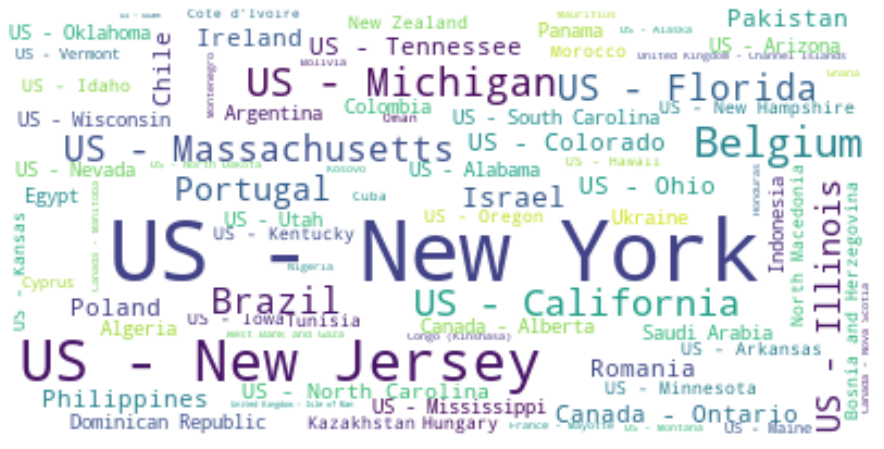

In [26]:
index_RO = list(final_df['Country'].unique()).index('Romania')
nr_cluster_RO = y_pred[index_RO]
lista_tari_comune = {}
for i,country in enumerate(final_df['Country'].unique()):
    if y_pred[i] == nr_cluster_RO:
        numar_cazuri = final_df.loc[final_df['Country']==country,'ConfirmedCases'].values[-1]
        lista_tari_comune[country] = numar_cazuri
   
f,ax = plt.subplots(figsize=(16,8))
wordcloud = WordCloud(background_color="white").generate_from_frequencies(lista_tari_comune)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

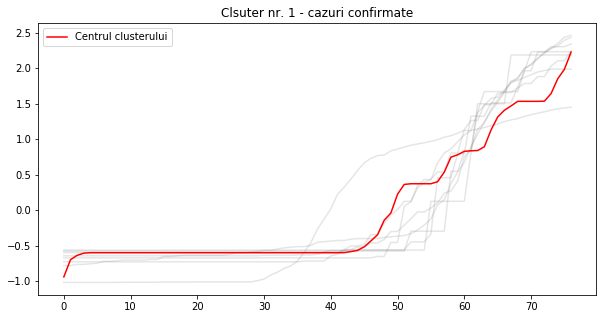

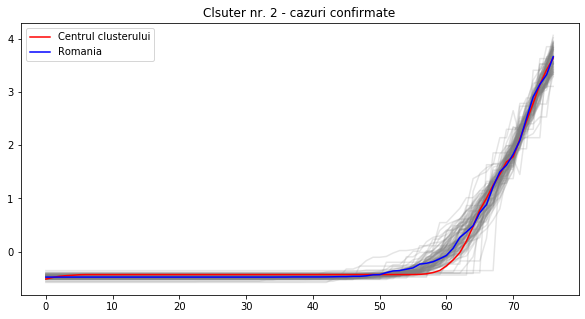

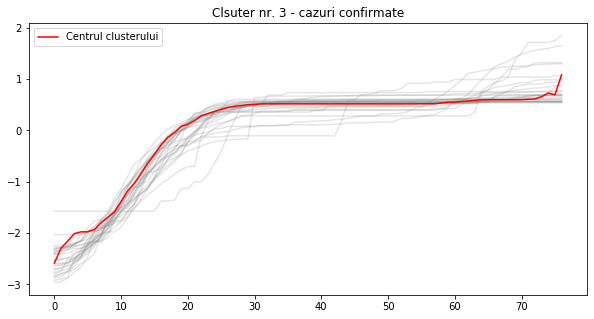

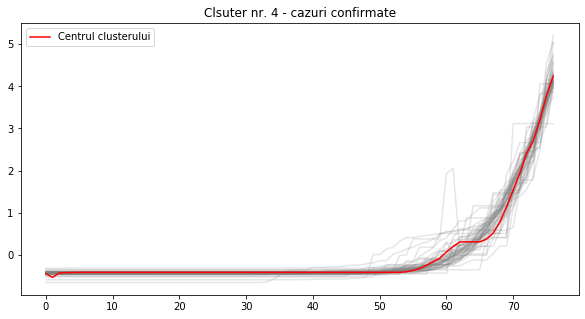

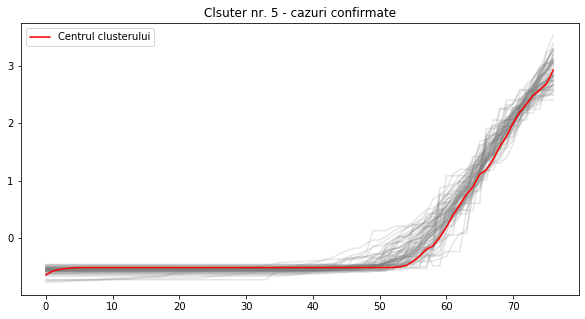

In [27]:
for yi in range(5):
    f,ax = plt.subplots(figsize=(10,5))
    for xx in train[y_pred==yi]:
        ax.plot(xx.ravel(),"grey",alpha=.2)
    ax.plot(dba_km.cluster_centers_[yi].ravel(), "red",label="Centrul clusterului")
    plt.title(f'Clsuter nr. {yi+1} - cazuri confirmate')
    if yi == nr_cluster_RO:
        xx = train[index_RO]
        ax.plot(xx.ravel(),"blue",label="Romania")
    plt.legend(loc='best')
    plt.show()
    plt.close()

# Clusterizare in functie de decese 

In [28]:
train = make_timeserie_ndarray(final_df,'Fatalities')
train = TimeSeriesScalerMeanVariance().fit_transform(train)

In [29]:
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=5,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10)

y_pred = dba_km.fit_predict(train)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


4.686 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


3.164 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.4s finished


3.093 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.998 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.995 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2.995 --> 

[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.995 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


3.889 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.671 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.564 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.413 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.384 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.316 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.277 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.274 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.4s finished


2.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.268 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.264 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.2s finished


2.255 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.5s finished


2.226 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.171 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.163 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


2.162 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.4s finished


2.162 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done 1220 out of 1220 | elapsed:    0.3s finished


'Romania apartine clusterului 2'

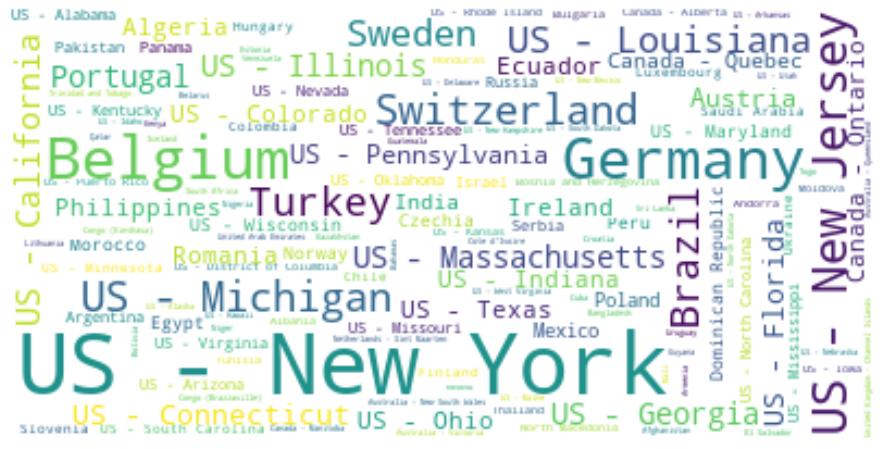

In [30]:
index_RO = list(final_df['Country'].unique()).index('Romania')
nr_cluster_RO = y_pred[index_RO]
display(f'Romania apartine clusterului {nr_cluster_RO+1}')
lista_tari_comune = {}
for i,country in enumerate(final_df['Country'].unique()):
    if y_pred[i] == nr_cluster_RO:
        numar_cazuri = final_df.loc[final_df['Country']==country,'Fatalities'].values[-1]
        lista_tari_comune[country] = numar_cazuri
   
f,ax = plt.subplots(figsize=(16,8))
wordcloud = WordCloud(background_color="white").generate_from_frequencies(lista_tari_comune)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

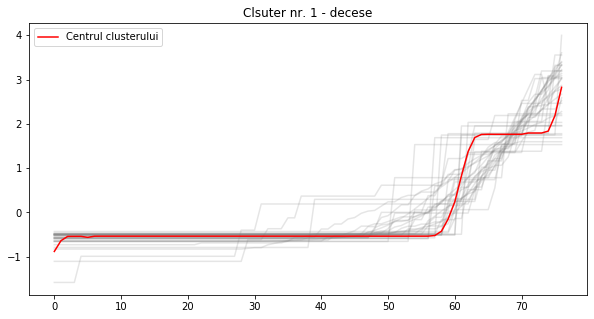

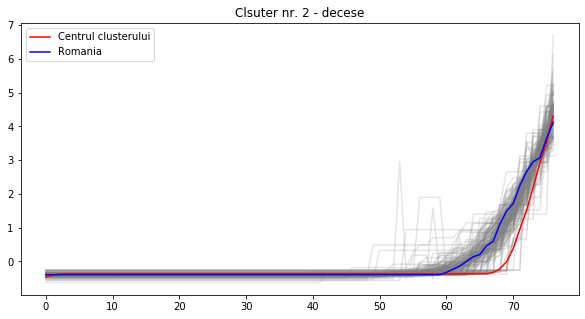

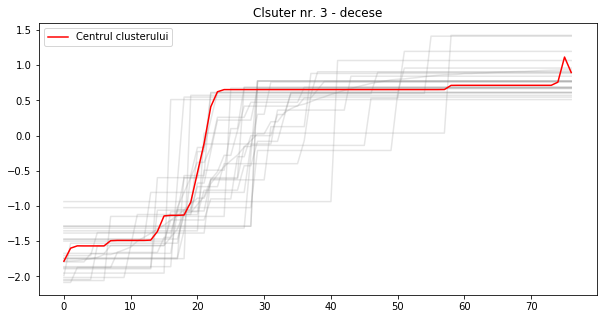

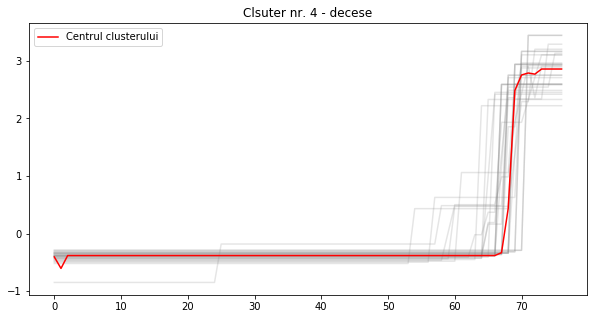

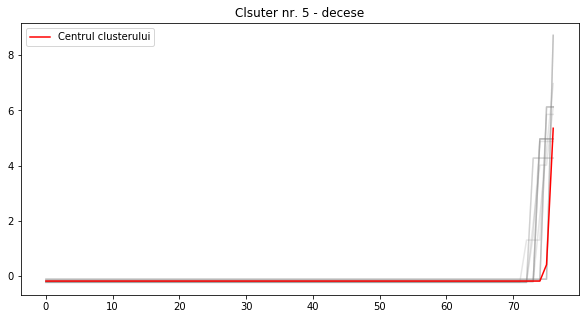

In [32]:
for yi in range(5):
    f,ax = plt.subplots(figsize=(10,5))
    for xx in train[y_pred==yi]:
        ax.plot(xx.ravel(),"grey",alpha=.2)
    ax.plot(dba_km.cluster_centers_[yi].ravel(), "red",label="Centrul clusterului")
    plt.title(f'Clsuter nr. {yi+1} - decese')
    if yi == nr_cluster_RO:
        xx = train[index_RO]
        ax.plot(xx.ravel(),"blue",label="Romania")
    plt.legend(loc='best')
    plt.show()
    plt.close()